In [1]:
from kmean import KMeans, PCA1
from utils import datas, prep_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
from core import get_inertia, get_inertia_plot, elbow_method_sklearn


## Load the data

In [3]:
# Load the data and print the first five rows
 
data = datas()
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Prepare the data for clustering by removing the 'id' column and converting to a NumPy array

x_mall = prep_data(data)
x_mall.shape

/Users/jordanbuwa/Desktop/K_means/K-Means/utils.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encod = data.replace({"Male": 1, "Female": 0})


(200, 4)

## Clustering with 5 clusters

Convergence reached after 9 steps!!!


/Users/jordanbuwa/Desktop/K_means/K-Means/kmean.py:161: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cluster[:, 0], cluster[:, 1], cmap='viridis', marker='o', s=50, alpha=0.6)


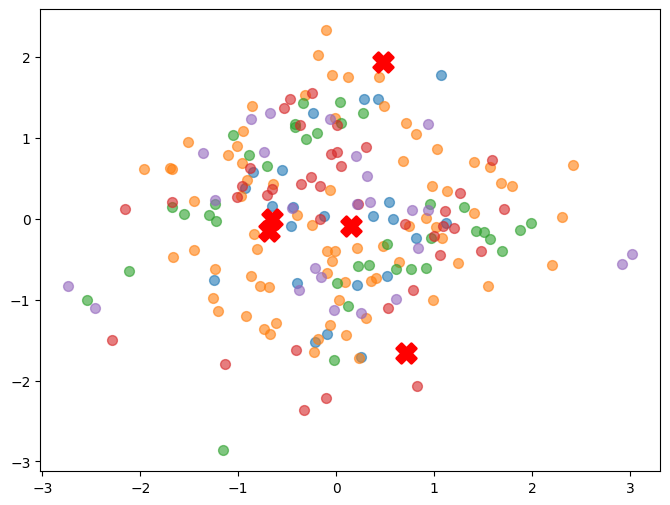

In [5]:
# Clustering the data using KMeans
kmean = KMeans(n_clusters=5, init_plus=False, max_iter=100)


# Fit the KMeans model to the data
kmean.fit(x_mall)
# Plotting the clusters
kmean.plot_()

Convergence reached after 8 steps!!!


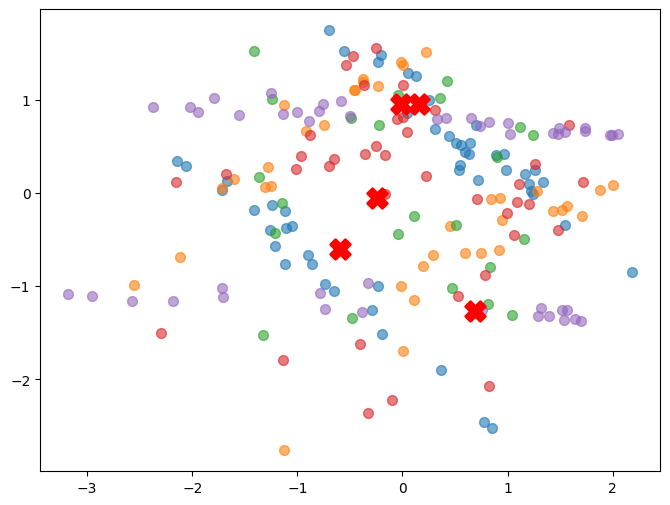

In [6]:
# Clustering the data using KMeans++
kmean = KMeans(n_clusters=5, init_plus=True, max_iter=100, seed=42)
kmean.fit(x_mall)
# Plotting the clusters
kmean.plot_()

number of clusters: 1
Convergence reached after 2 steps!!!
number of clusters: 2
Convergence reached after 5 steps!!!
number of clusters: 3
Convergence reached after 12 steps!!!
number of clusters: 4
Convergence reached after 7 steps!!!
number of clusters: 5
Convergence reached after 8 steps!!!
number of clusters: 6
Convergence reached after 5 steps!!!
number of clusters: 7
Convergence reached after 6 steps!!!
number of clusters: 8
Convergence reached after 7 steps!!!
number of clusters: 9
Convergence reached after 6 steps!!!
number of clusters: 10
Convergence reached after 7 steps!!!


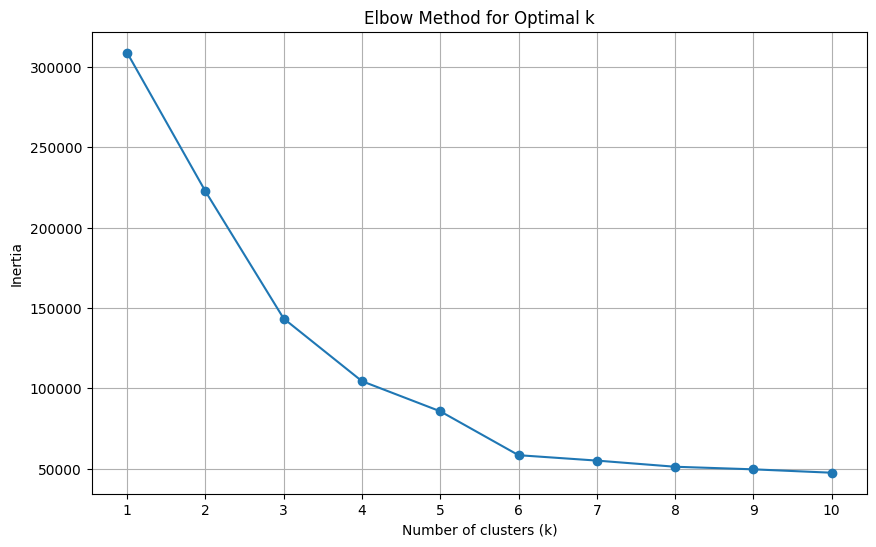

In [7]:
# Finding the optimal number of clusters using the Elbow method (KMeans++ initialization)
inertia1 = get_inertia(x_mall, True)
get_inertia_plot(inertia1)



In [8]:
# Determining the optimal number of clusters using the Elbow method (KMeans++ initialization)

# Compute relative drop in WCSS
relative_drops = [ (inertia1[i-1] - inertia1[i]) / inertia1[i-1] for i in range(1, len(inertia1)) ]

for i, drop in enumerate(relative_drops, start=2):  # since drop is between k=i-1 and k=i
    print(f"k={i}, drop={drop:.2%}")

k=2, drop=27.92%
k=3, drop=35.59%
k=4, drop=27.18%
k=5, drop=17.95%
k=6, drop=31.88%
k=7, drop=5.76%
k=8, drop=6.97%
k=9, drop=3.15%
k=10, drop=4.26%


The best k is the first k after which there is a small drop

Convergence reached after 13 steps!!!


/Users/jordanbuwa/Desktop/K_means/K-Means/kmean.py:161: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cluster[:, 0], cluster[:, 1], cmap='viridis', marker='o', s=50, alpha=0.6)


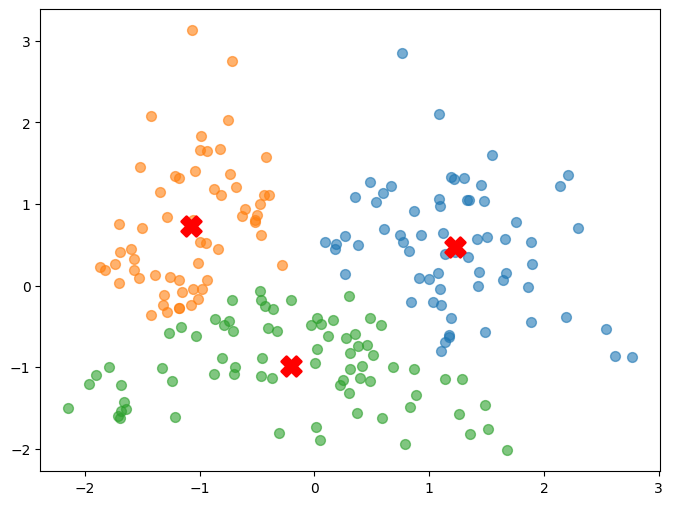

In [21]:
k = 3
kmean_p = KMeans(n_clusters=k, init_plus=True, max_iter=100, seed=42)
kmean_p.fit(x_mall)
# Plotting the clusters
kmean_p.plot_()

number of clusters: 1
Convergence reached after 2 steps!!!
number of clusters: 2
Convergence reached after 11 steps!!!
number of clusters: 3
Convergence reached after 14 steps!!!
number of clusters: 4
Convergence reached after 13 steps!!!
number of clusters: 5
Convergence reached after 10 steps!!!
number of clusters: 6
Convergence reached after 10 steps!!!
number of clusters: 7
Convergence reached after 10 steps!!!
number of clusters: 8
Convergence reached after 10 steps!!!
number of clusters: 9
Convergence reached after 15 steps!!!
number of clusters: 10
Convergence reached after 8 steps!!!


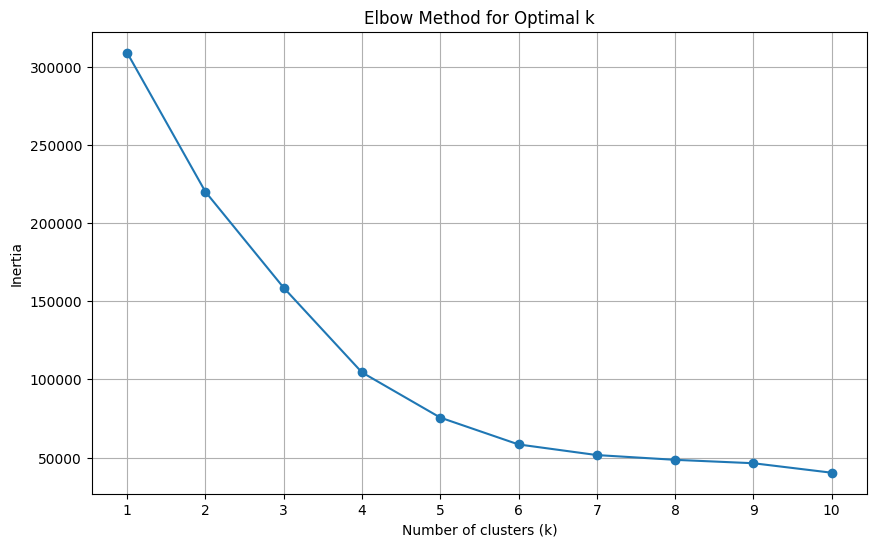

In [10]:
# Finding the optimal number of clusters using the Elbow method (KMeans simple initialization)
inertia2 = get_inertia(x_mall, False)
get_inertia_plot(inertia2)

In [11]:
# Determining the optimal number of clusters using the Elbow method (KMeans++ initialization)

# Compute relative drop in WCSS
relative_drops = [ (inertia1[i-1] - inertia1[i]) / inertia1[i-1] for i in range(1, len(inertia1)) ]

for i, drop in enumerate(relative_drops, start=2):  # since drop is between k=i-1 and k=i
    print(f"k={i}, drop={drop:.2%}")

best_k = 6

k=2, drop=27.92%
k=3, drop=35.59%
k=4, drop=27.18%
k=5, drop=17.95%
k=6, drop=31.88%
k=7, drop=5.76%
k=8, drop=6.97%
k=9, drop=3.15%
k=10, drop=4.26%


Convergence reached after 13 steps!!!


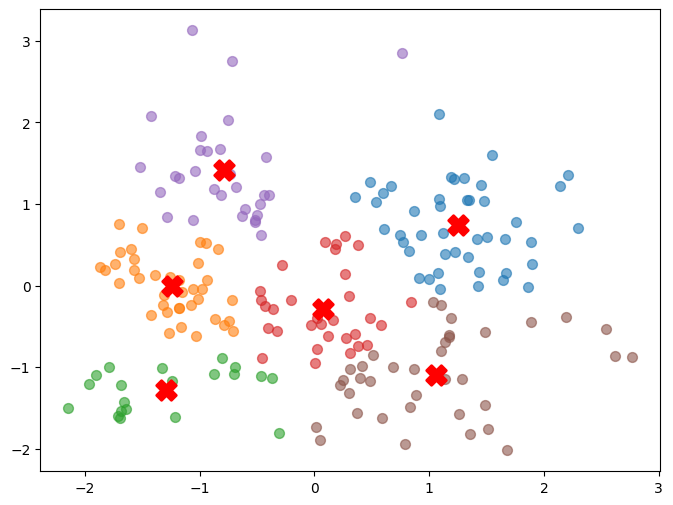

In [17]:
kmean_p1 = KMeans(n_clusters=best_k, init_plus=True, max_iter=100, seed=42)
kmean_p1.fit(x_mall)
# Plotting the clusters
kmean_p1.plot_()

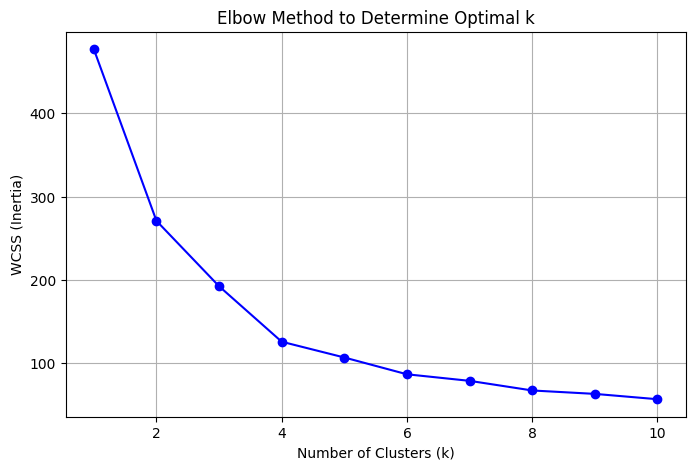

k=2, drop=43.22%
k=3, drop=29.00%
k=4, drop=34.66%
k=5, drop=15.08%
k=6, drop=18.90%
k=7, drop=9.10%
k=8, drop=14.71%
k=9, drop=6.12%
k=10, drop=10.17%


In [20]:
inertia3 = elbow_method_sklearn(x_mall)
# Compute relative drop in WCSS
relative_drops = [ (inertia3[i-1] - inertia3[i]) / inertia3[i-1] for i in range(1, len(inertia3)) ]
for i, drop in enumerate(relative_drops, start=2):  # since drop is between k=i-1 and k=i
    print(f"k={i}, drop={drop:.2%}")
# Plotting the inertia values

In [19]:
from sklearn.cluster import KMeans as skKMeans

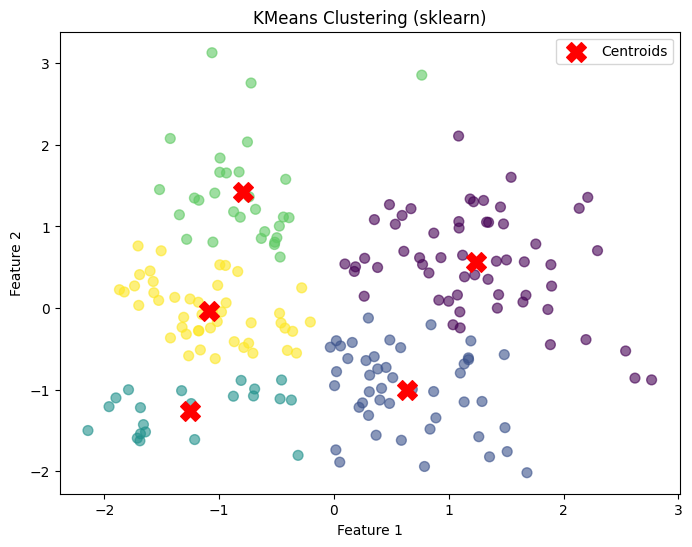

In [15]:
x_mall = PCA1(n_components=2).fit(x_mall).transform()
kmean = skKMeans(n_clusters=5, init='k-means++', max_iter=100, random_state=42)
kmean.fit(x_mall)
# Plotting the clusters using sklearn KMeans
plt.figure(figsize=(8, 6))
plt.scatter(x_mall[:, 0], x_mall[:, 1], c=kmean.labels_, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering (sklearn)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

